## Gunakan dataset CC_Customer_Dataset.csv dari Tugas Pratikum

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load dataset
# df = pd.read_csv('data/Mall_Customers.csv')
df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/p6/data/CC_Customer_Dataset.csv')

# Inspect info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


## Buatlah model klasterisasi dengan menggunakan Agglomerative Clustering dengan seluruh variabel yang dapat digunakan.

In [8]:
X= df.iloc[:, 2:7]

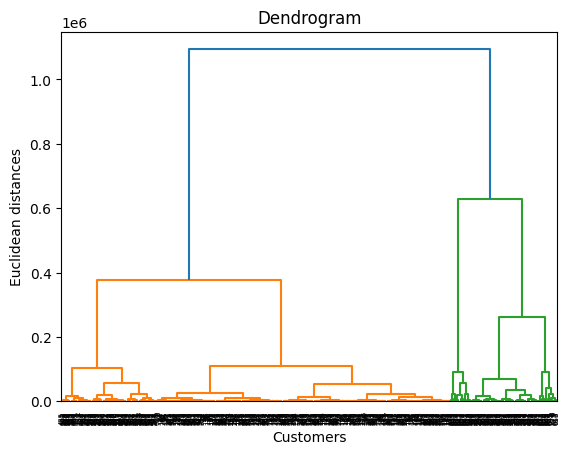

In [9]:
# Build dendogram
import scipy.cluster.hierarchy as sch

# Build dendogram using ward distance
# more info - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [11]:
# Build Cluster using Agglomerative Method
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Tunjukkan bentuk cluster-nya berdasarkan dua fitur tersebut.

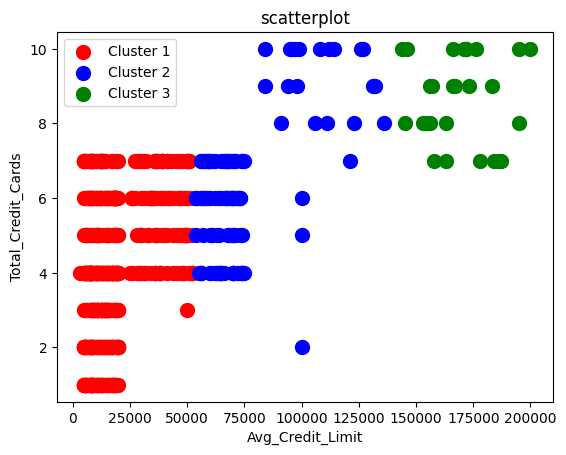

In [17]:
# Visualize The Result
plt.scatter(X.values[y_hc == 0, 0], X.values[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.values[y_hc == 1, 0], X.values[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[y_hc == 2, 0], X.values[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('scatterplot')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend()
plt.show()

## Tentukan nilai silhouette score dan DBI dari model.

In [15]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering using silhouette coefficient
silhouette_avg = silhouette_score(X, y_hc)
print(f'Silhouette Coefficient: {silhouette_avg}')

Silhouette Coefficient: 0.6811232268244817


In [20]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
dbi = davies_bouldin_score(X, y_hc)
print(f'Davies-Bouldin Index: {dbi}')

Davies-Bouldin Index: 0.38800576073929305
